In [1]:
## Name – Rohan Rashinkar
## Roll No – I4239
## Division – 2
## Practical - 3

In [2]:
# Build the Image classification model by dividing the model into following 4 stages:
# a. Loading and preprocessing the image data
# b. Defining the model’s architecture
# c. Training the model
# d. Estimating the model’s performance

In [35]:
import zipfile
import os
import tensorflow as tf

In [14]:
# download data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
import zipfile
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2022-11-13 21:10:58--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.192.48, 142.250.192.80, 142.250.192.112, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.192.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: 'pizza_steak.zip.3'

     0K .......... .......... .......... .......... ..........  0% 1.36M 77s
    50K .......... .......... .......... .......... ..........  0% 2.37M 60s
   100K .......... .......... .......... .......... ..........  0% 4.10M 49s
   150K .......... .......... .......... .......... ..........  0% 3.94M 43s
   200K .......... .......... .......... .......... ..........  0% 7.05M 37s
   250K .......... .......... .......... .......... ..........  0% 6.69M 34s
   300K .......... .......... .......... .......... ..........  0% 6.50M 31s
   350K .......... .......... .

 52350K .......... .......... .......... .......... .......... 48% 6.25M 9s
 52400K .......... .......... .......... .......... .......... 49% 6.56M 9s
 52450K .......... .......... .......... .......... .......... 49% 8.49M 9s
 52500K .......... .......... .......... .......... .......... 49% 7.03M 9s
 52550K .......... .......... .......... .......... .......... 49% 6.73M 9s
 52600K .......... .......... .......... .......... .......... 49% 7.58M 9s
 52650K .......... .......... .......... .......... .......... 49% 7.53M 9s
 52700K .......... .......... .......... .......... .......... 49% 7.22M 9s
 52750K .......... .......... .......... .......... .......... 49% 5.30M 9s
 52800K .......... .......... .......... .......... .......... 49% 3.56M 9s
 52850K .......... .......... .......... .......... .......... 49% 33.5M 9s
 52900K .......... .......... .......... .......... .......... 49% 10.3M 9s
 52950K .......... .......... .......... .......... .......... 49% 6.37M 9s
 53000K ....

In [27]:
ls pizza_steak

 Volume in drive C is Windows
 Volume Serial Number is 5A98-DA59

 Directory of C:\Users\hp\Desktop\deep\pizza_steak

13-11-2022  21:06    <DIR>          .
13-11-2022  21:13    <DIR>          ..
13-11-2022  21:06    <DIR>          test
13-11-2022  21:06    <DIR>          train
               0 File(s)              0 bytes
               4 Dir(s)  79,351,877,632 bytes free


In [28]:
#!ls pizza_steak/train/steak

In [30]:
# Walk through pizza_steak directory and list number of files
for dirpath,dirnames,filenames in os.walk("pizza_steak"):
  print("There are {} directories and {} images in {}".format(len(dirnames),len(filenames),dirpath))


There are 2 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak\test
There are 0 directories and 250 images in pizza_steak\test\pizza
There are 0 directories and 250 images in pizza_steak\test\steak
There are 2 directories and 0 images in pizza_steak\train
There are 0 directories and 750 images in pizza_steak\train\pizza
There are 0 directories and 750 images in pizza_steak\train\steak


In [29]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

In [31]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Create a list of class_nmaes from the subdirectories
print(class_names)


['pizza' 'steak']


In [32]:
# Lets visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
  # Setup the target directory (we'l view images from here)
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder),1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image
  
  return img


Image shape: (512, 512, 3)


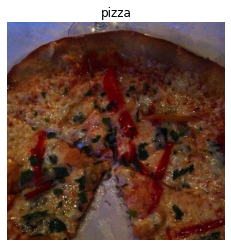

In [33]:
# View a random image from training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")


In [36]:
tf.constant(img)


<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 88, 114, 191],
        [ 90, 116, 191],
        [ 80, 106, 181],
        ...,
        [ 80,  74, 118],
        [ 90,  85, 126],
        [ 87,  82, 123]],

       [[ 78, 104, 179],
        [ 90, 116, 191],
        [ 87, 113, 188],
        ...,
        [ 87,  82, 123],
        [ 92,  87, 128],
        [ 88,  83, 124]],

       [[ 78, 104, 179],
        [ 95, 121, 196],
        [ 96, 120, 194],
        ...,
        [ 95,  90, 131],
        [ 93,  88, 129],
        [ 91,  86, 126]],

       ...,

       [[ 80,  31,  24],
        [ 69,  20,  13],
        [ 64,  15,   8],
        ...,
        [ 86,  51,  29],
        [ 76,  41,  21],
        [ 64,  32,  11]],

       [[ 83,  34,  29],
        [ 70,  21,  16],
        [ 66,  17,  12],
        ...,
        [ 84,  52,  29],
        [ 72,  40,  19],
        [ 68,  36,  15]],

       [[ 95,  46,  42],
        [ 88,  39,  35],
        [ 81,  34,  28],
        ...,
        [ 91,  59,  3

In [37]:
# View the image shape
img.shape # return width,height,color channels


(512, 512, 3)

In [38]:
# Get all the pixel values between 0 & 1
img/255.


array([[[0.34509804, 0.44705882, 0.74901961],
        [0.35294118, 0.45490196, 0.74901961],
        [0.31372549, 0.41568627, 0.70980392],
        ...,
        [0.31372549, 0.29019608, 0.4627451 ],
        [0.35294118, 0.33333333, 0.49411765],
        [0.34117647, 0.32156863, 0.48235294]],

       [[0.30588235, 0.40784314, 0.70196078],
        [0.35294118, 0.45490196, 0.74901961],
        [0.34117647, 0.44313725, 0.7372549 ],
        ...,
        [0.34117647, 0.32156863, 0.48235294],
        [0.36078431, 0.34117647, 0.50196078],
        [0.34509804, 0.3254902 , 0.48627451]],

       [[0.30588235, 0.40784314, 0.70196078],
        [0.37254902, 0.4745098 , 0.76862745],
        [0.37647059, 0.47058824, 0.76078431],
        ...,
        [0.37254902, 0.35294118, 0.51372549],
        [0.36470588, 0.34509804, 0.50588235],
        [0.35686275, 0.3372549 , 0.49411765]],

       ...,

       [[0.31372549, 0.12156863, 0.09411765],
        [0.27058824, 0.07843137, 0.05098039],
        [0.25098039, 0

In [39]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(42)

# preprocess data (get all of the pixel values between 0 & 1, also called as scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
   tf.keras.layers.Conv2D(filters=10,
                          kernel_size=3,
                          activation="relu",
                          input_shape=(224,224,3)),
   tf.keras.layers.Conv2D(10,3,activation="relu"),
   tf.keras.layers.MaxPool2D(pool_size=2,
                             padding="valid"),
   tf.keras.layers.Conv2D(10,3,activation="relu"),
   tf.keras.layers.Conv2D(10,3,activation="relu"),
   tf.keras.layers.MaxPool2D(2),
   tf.keras.layers.Flatten(),
   tf.keras.layers.Dense(1,activation="sigmoid")
])

# Compile or CNN
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 74s 2s/step - loss: 0.6083 - accuracy: 0.6593 - val_loss: 0.4384 - val_accuracy: 0.8240
Epoch 2/5
47/47 [==============================] - 65s 1s/step - loss: 0.4692 - accuracy: 0.7880 - val_loss: 0.4072 - val_accuracy: 0.8460
Epoch 3/5
47/47 [==============================] - 72s 2s/step - loss: 0.4366 - accuracy: 0.8040 - val_loss: 0.3535 - val_accuracy: 0.8460
Epoch 4/5
47/47 [==============================] - 70s 1s/step - loss: 0.3867 - accuracy: 0.8300 - val_loss: 0.4665 - val_accuracy: 0.7740
Epoch 5/5
47/47 [==============================] - 67s 1s/step - loss: 0.3749 - accuracy: 0.8427 - val_loss: 0.3813 - val_accuracy: 0.8180
